In [1]:
import lheanalysis as lhea
from copy import deepcopy
from pprint import pprint as p

files_dict = {
    'kl0': {
        'fname':'../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_kl0.220817_0738_lhe/hhdec.lhe',
    },
    'kl1': {
        'fname':'../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_kl1.220817_0740_lhe/hhdec.lhe',
    },
    'kl2p5' : {
        'fname':'../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_kl2p5.220817_0743_lhe/hhdec.lhe',
    },
    'kl5': {
        'fname':'../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_kl5.220817_0742_lhe/hhdec.lhe',
    },
    'klm1': {
        'fname':'../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_klm1.220817_0741_lhe/hhdec.lhe',  
    },   
}

p(files_dict)


{'kl0': {'fname': '../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_kl0.220817_0738_lhe/hhdec.lhe'},
 'kl1': {'fname': '../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_kl1.220817_0740_lhe/hhdec.lhe'},
 'kl2p5': {'fname': '../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_kl2p5.220817_0743_lhe/hhdec.lhe'},
 'kl5': {'fname': '../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_kl5.220817_0742_lhe/hhdec.lhe'},
 'klm1': {'fname': '../../grid_outputs/whizard/user.valentem.singularity_whizard.HH_klm1.220817_0741_lhe/hhdec.lhe'}}


In [2]:
values_dict_tmp = {
    'nHiggs': {
        'hist_opts' : {'bins':10,'range':(0,10)},
        'plot_opts': {'xlabel': '$n_{Higgs}$', 'logy' : False, 'histtype' : 'step'},
        'vals' : [],
    },
    'mHH': {
        'hist_opts' : {'bins':300,'range':(0,3000)},
        'plot_opts': {'xlabel': '$m_{HH} (GeV)$', 'logy' : False, 'histtype' : 'step'},
        'vals' : [],
    },
    'HH_pt': {
        'hist_opts' : {'bins':300,'range':(0,600)},
        'plot_opts': {'xlabel': '$p_T^{HH} (GeV)$', 'logy' : False, 'histtype' : 'step'},
        'vals' : [],
    },
    'H1_pt': {
        'hist_opts' : {'bins':300,'range':(0,600)},
        'plot_opts': {'xlabel': '$p_T^{H_1} (GeV)$', 'logy' : False, 'histtype' : 'step'},
        'vals' : [],
    },
    'H2_pt': {
        'hist_opts' : {'bins':300,'range':(0,600)},
        'plot_opts': {'xlabel': '$p_T^{H_2} (GeV)$', 'logy' : False, 'histtype' : 'step'},
        'vals' : [],
    },
}

values_dict={}

labels_dict = {
    'kl0': '$\kappa_\lambda = 0.0$',
    'kl1': '$\kappa_\lambda = 1.0$',
    'kl2p5': '$\kappa_\lambda = 2.5$',
    'kl5': '$\kappa_\lambda = 5.0$',
    'klm1': '$\kappa_\lambda = -1.0$',
}

for name,d in files_dict.items():
    print(f'Looking at {name}')
    if not name in values_dict.keys(): values_dict[name]=deepcopy(values_dict_tmp)
    lhea.fillHistograms(values_dict[name], d['fname'])

Looking at kl0
Looking at kl1
Looking at kl2p5
Looking at kl5
Looking at klm1


In [3]:
import matplotlib.pyplot as plt
plt.style.use('default')

def plotHistogram(vals,hist_dict,plot_dict):
    
    fig = plt.figure()

    plt.hist(vals, alpha=0.5, **hist_dict)
    # plt.hist(vals)

    if 'logy'   in plot_dict: plt.semilogy(plot_dict['logy'])
    if 'xlabel' in plot_dict: plt.xlabel(plot_dict['xlabel'])
    if 'ylabel' in plot_dict: plt.ylabel(plot_dict['ylabel'])
    if 'title'  in plot_dict: plt.ylabel(plot_dict['title'])
    # plt.legend(loc='best', ncol=2)

    plt.show()

def plotHistograms(vals,hist_dict,plot_dict,labels=None):

    fig = plt.figure()
    # fig.set_size_inches(12, 8)

    if labels is None:
        labels = [None] * len(vals)

    colors=['g','b','r','m','g']

    for v,hd,pd,l,c in zip(vals,hist_dict,plot_dict,labels,colors):

        plt.hist(v, label=l, **hd)

        if 'logy'   in pd: plt.semilogy(pd['logy'])
        if 'xlabel' in pd: plt.xlabel(pd['xlabel'])
        if 'ylabel' in pd: plt.ylabel(pd['ylabel'])
        if 'title'  in pd: plt.ylabel(pd['title'])
    plt.legend(loc='best')

    plt.show()


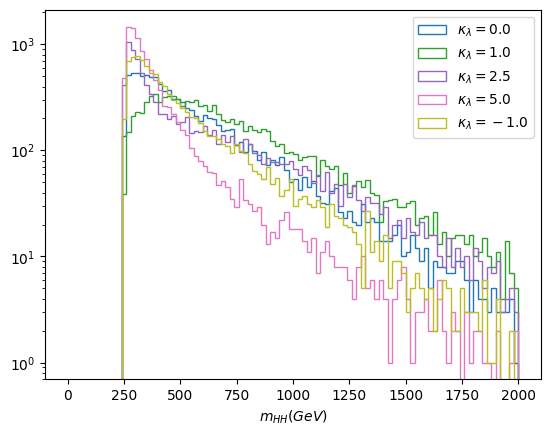

In [4]:
hname = 'mHH'
klnames=list(files_dict.keys())
plotHistograms([values_dict[klname][hname]['vals'] for klname in klnames],
              [{'bins':100,'range':(0,2000), 'histtype' : 'step'}]*len(klnames),
              [{'xlabel': '$m_{HH} (GeV)$', 'logy' : True}]*len(klnames),
              labels=[labels_dict[klname] for klname in klnames],
              )


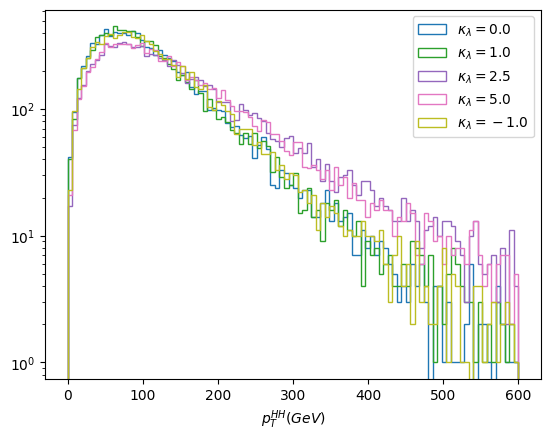

In [5]:
hname = 'HH_pt'
klnames=list(files_dict.keys())
plotHistograms([values_dict[klname][hname]['vals'] for klname in klnames],
              [{'bins':100,'range':(0,600), 'histtype' : 'step'}]*len(klnames),
              [{'xlabel': '$p_T^{HH} (GeV)$', 'logy' : False}]*len(klnames),
              labels=[labels_dict[klname] for klname in klnames],
              )


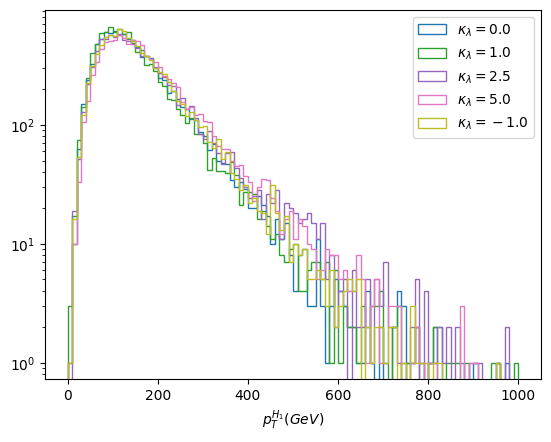

In [6]:
hname = 'H1_pt'
klnames=list(files_dict.keys())
plotHistograms([values_dict[klname][hname]['vals'] for klname in klnames],
              [{'bins':100,'range':(0,1000), 'histtype' : 'step'}]*len(klnames),
              [{'xlabel': '$p_T^{H_1} (GeV)$', 'logy' : False}]*len(klnames),
              labels=[labels_dict[klname] for klname in klnames],
              )

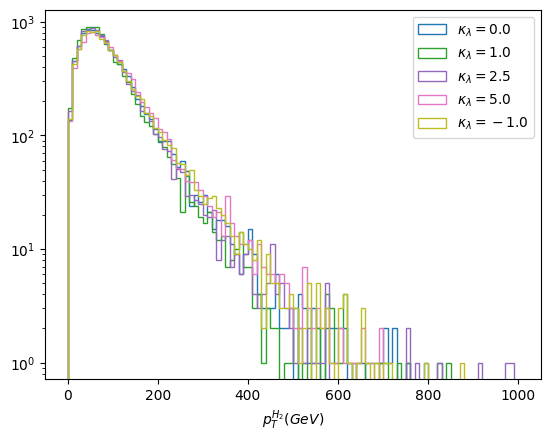

In [7]:
hname = 'H2_pt'
klnames=list(files_dict.keys())
plotHistograms([values_dict[klname][hname]['vals'] for klname in klnames],
              [{'bins':100,'range':(0,1000), 'histtype' : 'step'}]*len(klnames),
              [{'xlabel': '$p_T^{H_2} (GeV)$', 'logy' : False}]*len(klnames),
              labels=[labels_dict[klname] for klname in klnames],
              )

# Linear combination

In [8]:
import klcomb
import numpy as np

def getCombHist(kl,hname,hist_opts):
    w_zero = klcomb.xsweight_like(values_dict['kl0'][hname]['vals'],'kl0')
    h_zero,bins = np.histogram(values_dict['kl0'][hname]['vals'], weights=w_zero, **hist_opts)
    w_one = klcomb.xsweight_like(values_dict['kl1'][hname]['vals'],'kl1')
    h_one,_ = np.histogram(values_dict['kl1'][hname]['vals'], weights=w_one,**hist_opts)
    w_five = klcomb.xsweight_like(values_dict['kl5'][hname]['vals'],'kl5')
    h_five,_ = np.histogram(values_dict['kl5'][hname]['vals'], weights=w_five,**hist_opts)
    return klcomb.lin_comb(kl,h_zero,h_one,h_five),bins

In [9]:
hist_opts = {'bins':50,'range':(0,2000)}
h,bins=getCombHist(-1.0,'mHH',hist_opts)

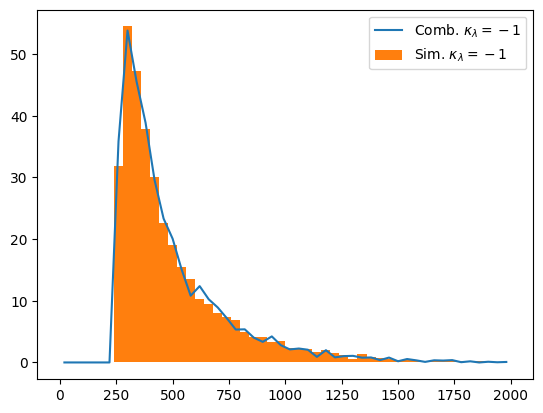

In [10]:
fig = plt.figure()

plt.plot((bins[1:]+bins[:-1])/2.,h,label='Comb. $\kappa_\lambda = -1$')
plt.hist(values_dict['klm1']['mHH']['vals'],weights=klcomb.xsweight_like(values_dict['klm1']['mHH']['vals'],'klm1'),label='Sim. $\kappa_\lambda = -1$',**hist_opts)
_=plt.legend(loc='best')